<a href="https://colab.research.google.com/github/JoshuaMagz/JoshuaMagz_3a_Itban3/blob/main/Laboratory_Exercise_2_Magdagasang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [6]:
dataset_path = '/content/gdrive/My Drive/Magdagasang_ITBAN3_Collab_Notebook/loans.csv'
df = pd.read_csv(dataset_path)
df.set_index('client_id', inplace=True)

In [7]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [9]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64


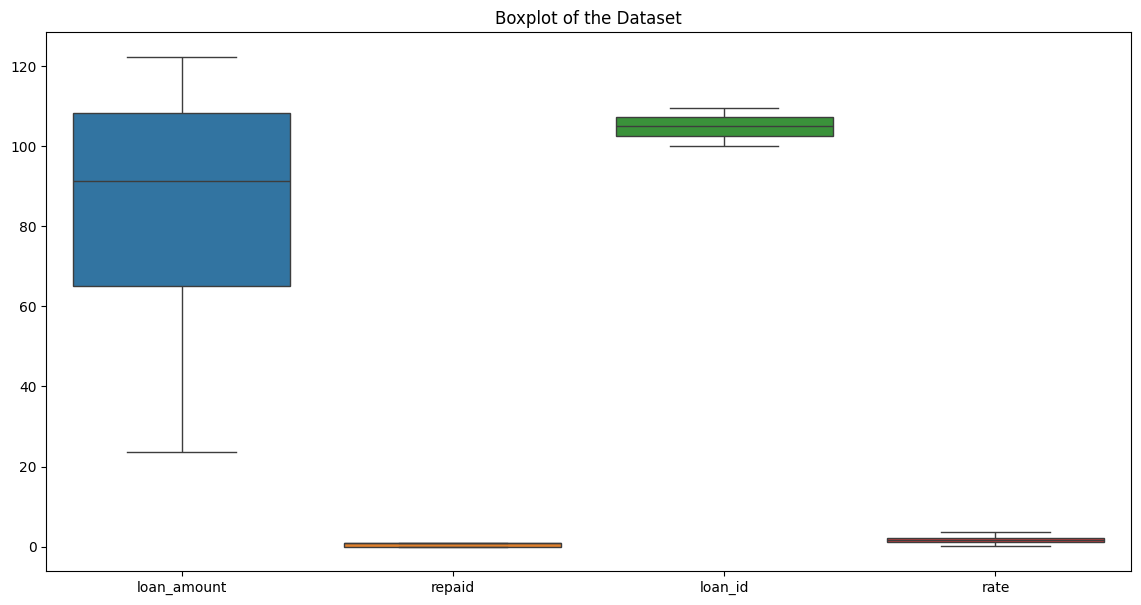

In [25]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df)
plt.title("Boxplot of the Dataset")
plt.show()

In [27]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(np.sqrt)
print("\nInfo after SQRT transformation:")
print(df.info())



Info after SQRT transformation:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    float64
 2   repaid       443 non-null    float64
 3   loan_id      443 non-null    float64
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.7+ KB
None


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numeric_cols]))

threshold = 3
df_capped = df[(z_scores < threshold).all(axis=1)]
print("\nInfo after Z-Score capping:")
print(df_capped.info())


Info after Z-Score capping:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    435 non-null    object 
 1   loan_amount  435 non-null    float64
 2   repaid       435 non-null    float64
 3   loan_id      435 non-null    float64
 4   loan_start   435 non-null    object 
 5   loan_end     435 non-null    object 
 6   rate         435 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.2+ KB
None


Column Names: Index(['loan_type', 'loan_amount', 'repaid', 'loan_id', 'loan_start',
       'loan_end', 'rate'],
      dtype='object')
Skewness of loan_amount: -0.9157820477370064
Kurtosis of loan_amount: 0.11272714997677857


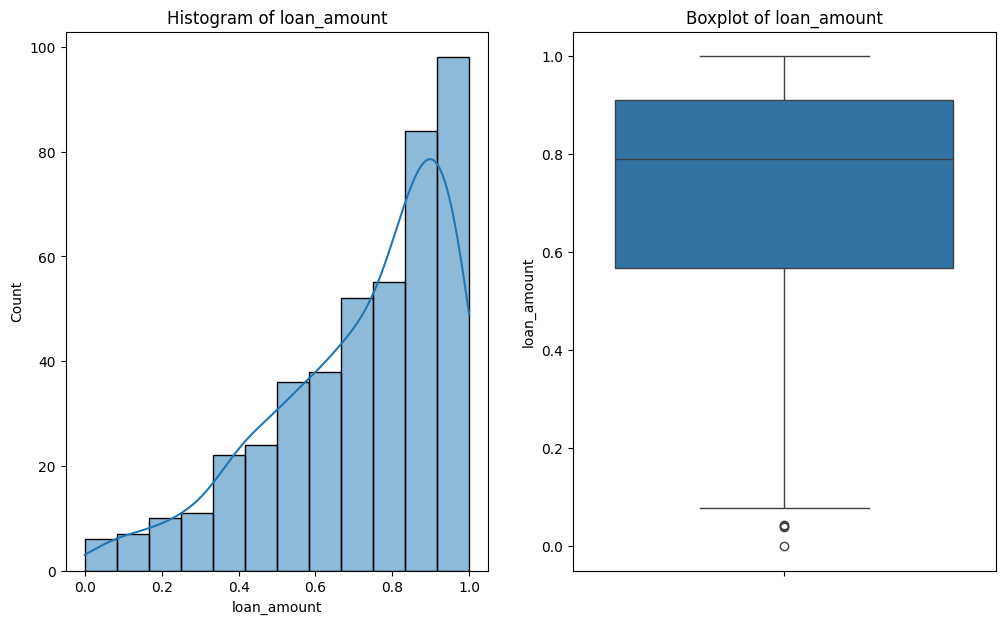

In [ ]:
print("Column Names:", df.columns)

# Select only numeric columns for Min-Max Normalization
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Apply Min-Max Normalization to numeric columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display skewness and kurtosis for 'loan_amount'
loan_amount_col = 'loan_amount'
skewness = df[loan_amount_col].skew()
kurtosis = df[loan_amount_col].kurtosis()

print(f'Skewness of {loan_amount_col}: {skewness}')
print(f'Kurtosis of {loan_amount_col}: {kurtosis}')

# Display skewness and kurtosis plots
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
sns.histplot(df[loan_amount_col], kde=True)
plt.title(f'Histogram of {loan_amount_col}')

plt.subplot(1, 2, 2)
sns.boxplot(df[loan_amount_col])
plt.title(f'Boxplot of {loan_amount_col}')

plt.show()

In [ ]:
df_encoded = pd.get_dummies(df, columns=['loan_type', 'repaid'])

print("First five rows after encoding:")
print(df_encoded.head())


First five rows after encoding:
           loan_amount   loan_id loan_start   loan_end      rate  loan_tenure  \
client_id                                                                       
46109         0.966523  0.126655 2002-04-16 2003-12-20  0.663842          613   
46109         0.846699  0.511676 2003-10-21 2005-07-17  0.574858          635   
46109         0.940572  0.514699 2006-02-01 2007-07-05  0.481895          519   
46109         0.934360  0.313010 2010-12-08 2013-05-05  0.573585          879   
46109         0.976516  0.725285 2010-07-07 2012-05-21  0.729097          684   

           loan_type_cash  loan_type_credit  loan_type_home  loan_type_other  \
client_id                                                                      
46109                   0                 0               1                0   
46109                   0                 1               0                0   
46109                   0                 0               1                0   


In [ ]:
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])
df['loan_tenure'] = (df['loan_end'] - df['loan_start']).dt.days
print("First five rows with loan tenure:")
print(df.head())


First five rows with loan tenure:
          loan_type  loan_amount  repaid   loan_id loan_start   loan_end  \
client_id                                                                  
46109          home     0.966523     0.0  0.126655 2002-04-16 2003-12-20   
46109        credit     0.846699     0.0  0.511676 2003-10-21 2005-07-17   
46109          home     0.940572     1.0  0.514699 2006-02-01 2007-07-05   
46109          cash     0.934360     1.0  0.313010 2010-12-08 2013-05-05   
46109        credit     0.976516     1.0  0.725285 2010-07-07 2012-05-21   

               rate  loan_tenure  
client_id                         
46109      0.663842          613  
46109      0.574858          635  
46109      0.481895          519  
46109      0.573585          879  
46109      0.729097          684  


In [ ]:
X = df_encoded.drop('rate', axis=1)
y = df_encoded['rate']

# Set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (354, 11)
Shape of X_test: (89, 11)
Shape of y_train: (354,)
Shape of y_test: (89,)
